In [1]:

## Version Tracking packages

## Data Analysis packages
import numpy as np
import pandas as pd

## Data Visualization packages
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib
%matplotlib inline
from pylab import rcParams
# import missingno as msno
import statistics as st
import warnings

## General Tools
# import opendatasets as od
import os
import re
import joblib
import json
import warnings


# sklearn library
import sklearn

### sklearn preprocessing tools
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,accuracy_score,roc_auc_score
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer,FunctionTransformer,OneHotEncoder


# Error Metrics 
from sklearn.metrics import r2_score #r2 square
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score


### Machine learning classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier #stacstic gradient descent clasifeier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb
from sklearn.ensemble import AdaBoostClassifier


#crossvalidation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut


#hyper parameter tunning

In [6]:
os.getcwd()

'c:\\Users\\Tavishi\\Airline_Passenger_Satisfaction_classification\\notebook\\data'

In [2]:
path=os.path.join(os.getcwd(),"train.csv")
path

'c:\\Users\\Tavishi\\Airline_Passanger_Satisfaction_ML\\notebook\\data\\train.csv'

In [4]:
train_df= pd.read_csv(path)
train_df.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [33]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   gender                             103904 non-null  object 
 3   customer_type                      103904 non-null  object 
 4   age                                103904 non-null  int64  
 5   type_of_travel                     103904 non-null  object 
 6   class                              103904 non-null  object 
 7   flight_distance                    103904 non-null  int64  
 8   inflight_wifi_service              103904 non-null  int64  
 9   departure/arrival_time_convenient  103904 non-null  int64  
 10  ease_of_online_booking             103904 non-null  int64  
 11  gate_location                      1039

In [13]:
train_df.rename(columns = {'Gender':'gender',
                        'Customer Type':'customer_type',
                        'Age':'age',
                        'Type of Travel':'type_of_travel',
                        'Class':'class',
                        'Flight Distance':'flight_distance',
                        'Departure/Arrival time convenient':'departure/arrival_time_convenient',
                        'Inflight wifi service':'inflight_wifi_service',
                        'Ease of Online booking':'ease_of_online_booking',
                        'Gate location':'gate_location',
                        'Food and drink':'food_and_drink',
                        'Online boarding':'online_boarding',
                        'Seat comfort':'seat_comfort',
                        'Inflight entertainment':'inflight_entertainment',
                        'On-board service':'on_board_service',
                        'Leg room service':'leg_room_service',
                        'Baggage handling':'baggage_handling',
                        'Checkin service':'checkin_service',
                        'Inflight service':'inflight_service',
                        'Cleanliness':'cleanliness',
                        'Departure Delay in Minutes':'departure_delay_in_minutes',
                        'Arrival Delay in Minutes':'arrival_delay_in_minutes',
                        'satisfaction':'satisfaction'},inplace=True,)
                        


In [15]:
train_df.columns

Index(['Unnamed: 0', 'id', 'gender', 'customer_type', 'age', 'type_of_travel',
       'class', 'flight_distance', 'inflight_wifi_service',
       'departure/arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'on_board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'satisfaction'],
      dtype='object')

In [17]:
for column in train_df.columns:
    unique_values = train_df[column].nunique()
    print(f"Column '{column}' has {unique_values} unique values.")


Column 'Unnamed: 0' has 103904 unique values.
Column 'id' has 103904 unique values.
Column 'gender' has 2 unique values.
Column 'customer_type' has 2 unique values.
Column 'age' has 75 unique values.
Column 'type_of_travel' has 2 unique values.
Column 'class' has 3 unique values.
Column 'flight_distance' has 3802 unique values.
Column 'inflight_wifi_service' has 6 unique values.
Column 'departure/arrival_time_convenient' has 6 unique values.
Column 'ease_of_online_booking' has 6 unique values.
Column 'gate_location' has 6 unique values.
Column 'food_and_drink' has 6 unique values.
Column 'online_boarding' has 6 unique values.
Column 'seat_comfort' has 6 unique values.
Column 'inflight_entertainment' has 6 unique values.
Column 'on_board_service' has 6 unique values.
Column 'leg_room_service' has 6 unique values.
Column 'baggage_handling' has 5 unique values.
Column 'checkin_service' has 6 unique values.
Column 'inflight_service' has 6 unique values.
Column 'cleanliness' has 6 unique va

In [24]:
for column in train_df.columns:
    unique_values = train_df[column].unique()
    print(f"Unique values for column '{column}':")
    print(unique_values)
    print()


Unique values for column 'Unnamed: 0':
[     0      1      2 ... 103901 103902 103903]

Unique values for column 'id':
[ 70172   5047 110028 ...  68825  54173  62567]

Unique values for column 'gender':
['Male' 'Female']

Unique values for column 'customer_type':
['Loyal Customer' 'disloyal Customer']

Unique values for column 'age':
[13 25 26 61 47 52 41 20 24 12 53 33 45 38  9 17 43 58 23 57 49 36 22 31
 15 35 67 37 40 34 39 50 29 54 21 28 27 69 60 48 59 46 30 66 64 44 51 32
 19 42 16 11 62  8 56 68 55 18 65 72 70 63 10  7 14 80 74 71 85 73 76 77
 75 79 78]

Unique values for column 'type_of_travel':
['Personal Travel' 'Business travel']

Unique values for column 'class':
['Eco Plus' 'Business' 'Eco']

Unique values for column 'flight_distance':
[ 460  235 1142 ...  974 1479  400]

Unique values for column 'inflight_wifi_service':
[3 2 4 1 5 0]

Unique values for column 'departure/arrival_time_convenient':
[4 2 5 3 1 0]

Unique values for column 'ease_of_online_booking':
[3 2 5 4 1 0

In [7]:
train_df["Customer Type"].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

train_df.info()

In [215]:
train_df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [216]:
train_df.drop(['Unnamed: 0','id'], axis=1, inplace=True)


In [217]:
null_df = test_df.isnull().sum().sort_values(ascending=False).to_frame()
null_df.columns= ["No of Null values"]
null_df["% of Null values"] = round(null_df["No of Null values"]/len(train_df)*100,2)
null_df[null_df["No of Null values"] > 0]

,No of Null values,% of Null values
Arrival Delay in Minutes,51,0.05


In [218]:
null_df = train_df.isnull().sum().sort_values(ascending=False).to_frame()
null_df.columns= ["No of Null values"]
null_df["% of Null values"] = round(null_df["No of Null values"]/len(train_df)*100,2)
null_df[null_df["No of Null values"] > 0]

,No of Null values,% of Null values
Arrival Delay in Minutes,310,0.3


In [219]:
train_df["satisfaction"].value_counts()

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64

In [220]:
test_df["satisfaction"].value_counts()

satisfaction
0    9475
1    7150
Name: count, dtype: int64

In [221]:
# numerical and categoriacl columns(features)
numeric_cols = train_df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_df.select_dtypes('object').columns.tolist()


In [222]:
# numerical features
print("Total numeric columns are:", len(numeric_cols))
print(numeric_cols)

Total numeric columns are: 18
['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


In [223]:
# categorical features
print("Total categorical columns are:", len(categorical_cols))
print(categorical_cols)

Total categorical columns are: 5
['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']


In [224]:
categorical_cols.remove("satisfaction")

In [225]:
# step1: Independent features and dependent features
input_cols = list(train_df.iloc[:,:-1])# independent features
target_col="satisfaction" # dependent feature 

In [226]:
train_val_df, test_df = train_test_split(train_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [227]:
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(62342, 23)
(20781, 23)
(20781, 23)


In [228]:
# copy of training dataset 
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

# copy of valdation dataset

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

# copy of test dataset

test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [229]:
# Impute missing numerical values
imputer = SimpleImputer(strategy = 'mean').fit(train_df[numeric_cols])
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [230]:
# Scale numeric features
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
scaler = MinMaxScaler().fit(train_df[numeric_cols])
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [231]:
# One-hot encode categorical features
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer,FunctionTransformer,OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(train_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

c:\Users\Tavishi\Airline-Passanger-Satisfaction--Classification\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [232]:
train_df['satisfaction'] = train_df['satisfaction'].map({'neutral or dissatisfied':0 , 'satisfied':1})
val_df['satisfaction'] = val_df['satisfaction'].map({'neutral or dissatisfied':0 , 'satisfied':1})
test_df['satisfaction'] = test_df['satisfaction'].map({'neutral or dissatisfied':0 , 'satisfied':1})

In [233]:
# Select the columns to be used for training/prediction

# training dataset
X_train = train_inputs[numeric_cols + encoded_cols]
y_train = train_df["satisfaction"]

# validation dataset
X_val = val_inputs[numeric_cols + encoded_cols]
y_val=  val_df["satisfaction"]

# test dataset
X_test = test_inputs[numeric_cols + encoded_cols]
y_test= test_df["satisfaction"]

In [234]:
def plot_roc_curve(y_true,y_prob_preds,ax):
    """
    To plot the ROC curve for the given predictions and model

    """ 
    fpr,tpr,threshold = roc_curve(y_true,y_prob_preds)
    roc_auc = auc(fpr,tpr)
    ax.plot(fpr,tpr,"b",label="AUC = %0.2f" % roc_auc)
    ax.set_title("Receiver Operating Characteristic")
    ax.legend(loc='lower right')
    ax.plot([0,1],[0,1],'r--')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate");
    plt.show();

In [235]:
def plot_confustion_matrix(y_true,y_preds,axes,name=''):
    """
    To plot the Confusion Matrix for the given predictions

    """     
    cm = confusion_matrix(y_true, y_preds)
    group_names = ['TN','FP','FN','TP']
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues',ax=axes)
    axes.set_ylim([2,0])
    axes.set_xlabel('Prediction')
    axes.set_ylabel('Actual')
    axes.set_title(f'{name} Confusion Matrix');


In [236]:
def make_classification_report(model,inputs,targets,model_name=None,record=False):
    """
     To Generate the classification report with all the metrics of a given model with confusion matrix as well as ROC AUC curve.

    """
    ### Getting the model name from model object
    if model_name is None: 
        model_name = str(type(model)).split(".")[-1][0:-2]

    ### Making the predictions for the given model
    preds = model.predict(inputs)
    if model_name in ["LinearSVC"]:
      prob_preds = model.decision_function(inputs)
    else:
      prob_preds = model.predict_proba(inputs)[:,1]

    ### printing the ROC AUC score
    auc_score = roc_auc_score(targets,prob_preds)
    print("ROC AUC Score : {:.2f}%\n".format(auc_score * 100.0))
    

    ### Plotting the Confusion Matrix and ROC AUC Curve
    fig, axes = plt.subplots(1, 2, figsize=(18,6))
    plot_confustion_matrix(targets,preds,axes[0],model_name)
    plot_roc_curve(targets,prob_preds,axes[1])

In [237]:
def train_model(model,X_train,y_tain, X_val,y_val):
  model.fit(X_train, y_tain)

  # prediction
  pred_train = model.predict(X_train)
  pred_val = model.predict(X_val)

  # model name
  model_name = str(type(model)).split(".")[-1][0:-2]
  print(f"\t\t{model_name.upper()} MODEL\n")

  print('Training part:')
  print(classification_report(y_tain, pred_train,
                                      target_names=['Cancelled', 'Arrived']))
  print('validation part:')
  print(classification_report(y_val, pred_val,
                                      target_names=['Cancelled', 'Arrived']))
  print("Accuracy score for traing dataset",accuracy_score(y_tain, pred_train))
  print("Accuracy score for validation dataset",accuracy_score(y_val, pred_val))

  make_classification_report(model,X_val,y_val)

c:\Users\Tavishi\Airline-Passanger-Satisfaction--Classification\venv\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Log_reg : 

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.88      0.90      0.89     35308
              satisfaction       0.87      0.84      0.85     27034

                  accuracy                           0.87     62342
                 macro avg       0.87      0.87      0.87     62342
              weighted avg       0.87      0.87      0.87     62342

Validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.88      0.90      0.89     11858
              satisfaction       0.86      0.84      0.85      8923

                  accuracy                           0.88     20781
                 macro avg       0.87      0.87      0.87     20781
              weighted avg       0.87      0.88      0.87     20781

Accuracy score for traing dataset 0.8743383272913926
Accuracy score for validation dataset 0.8750300755497811
ROC AUC Score : 92.67%



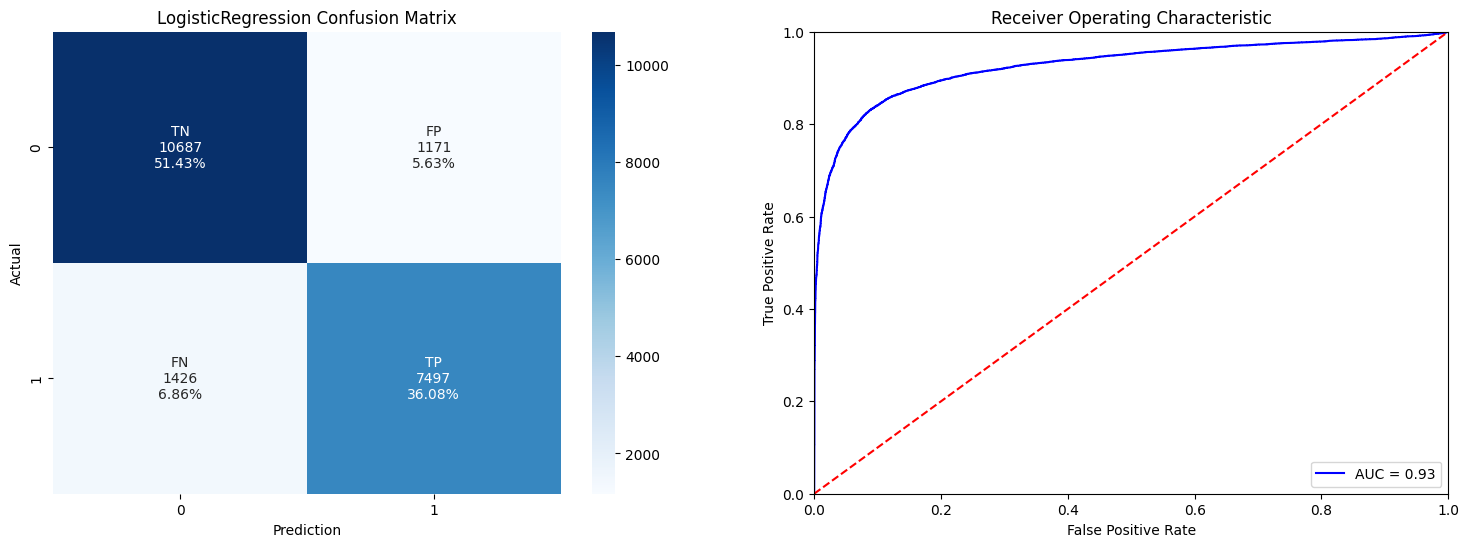

Gaus_NB : 

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.86      0.87      0.87     35308
              satisfaction       0.83      0.82      0.82     27034

                  accuracy                           0.85     62342
                 macro avg       0.84      0.84      0.84     62342
              weighted avg       0.85      0.85      0.85     62342

Validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.87      0.87      0.87     11858
              satisfaction       0.82      0.82      0.82      8923

                  accuracy                           0.85     20781
                 macro avg       0.84      0.84      0.84     20781
              weighted avg       0.85      0.85      0.85     20781

Accuracy score for traing dataset 0.8472458374771422
Accuracy score for validation dataset 0.8476492950291131
ROC AUC Score : 91.53%



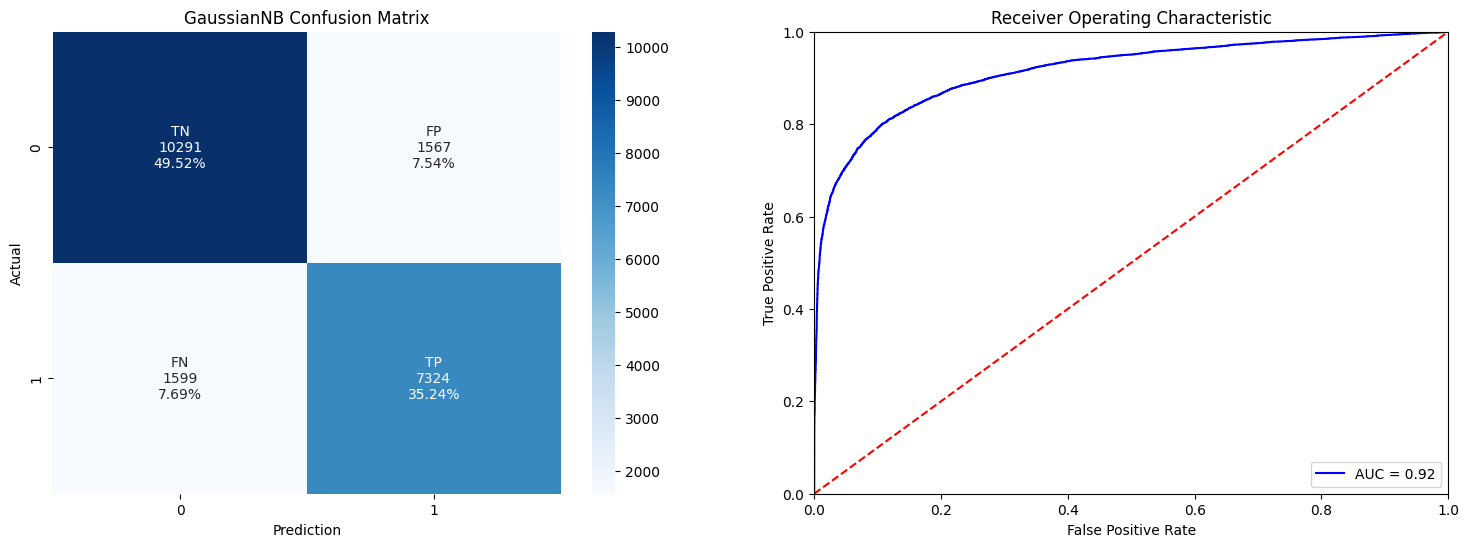

KNN : 

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.93      0.98      0.95     35308
              satisfaction       0.97      0.90      0.93     27034

                  accuracy                           0.94     62342
                 macro avg       0.95      0.94      0.94     62342
              weighted avg       0.95      0.94      0.94     62342

Validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.91      0.96      0.94     11858
              satisfaction       0.95      0.87      0.91      8923

                  accuracy                           0.93     20781
                 macro avg       0.93      0.92      0.92     20781
              weighted avg       0.93      0.93      0.92     20781

Accuracy score for traing dataset 0.9447884251387507
Accuracy score for validation dataset 0.9251720321447476
ROC AUC Score : 96.60%



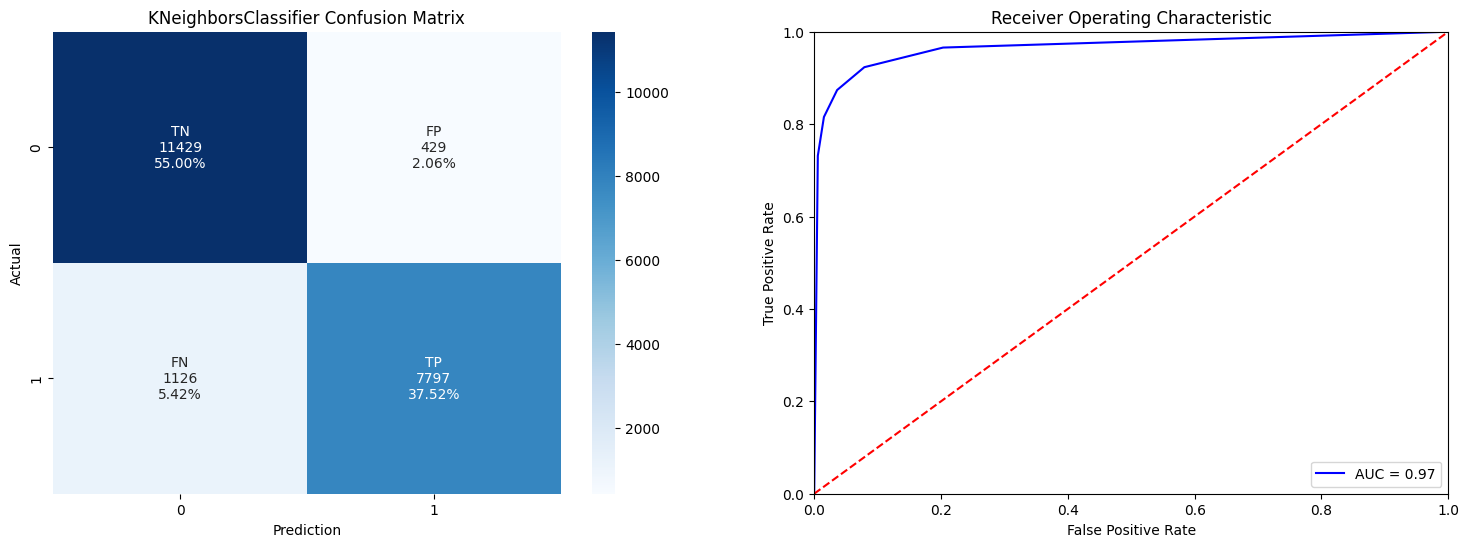

SVC : 

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.88      0.90      0.89     35308
              satisfaction       0.87      0.83      0.85     27034

                  accuracy                           0.87     62342
                 macro avg       0.87      0.87      0.87     62342
              weighted avg       0.87      0.87      0.87     62342

Validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.88      0.90      0.89     11858
              satisfaction       0.86      0.84      0.85      8923

                  accuracy                           0.87     20781
                 macro avg       0.87      0.87      0.87     20781
              weighted avg       0.87      0.87      0.87     20781

Accuracy score for traing dataset 0.873119245452504
Accuracy score for validation dataset 0.8741157788364371
ROC AUC Score : 92.62%



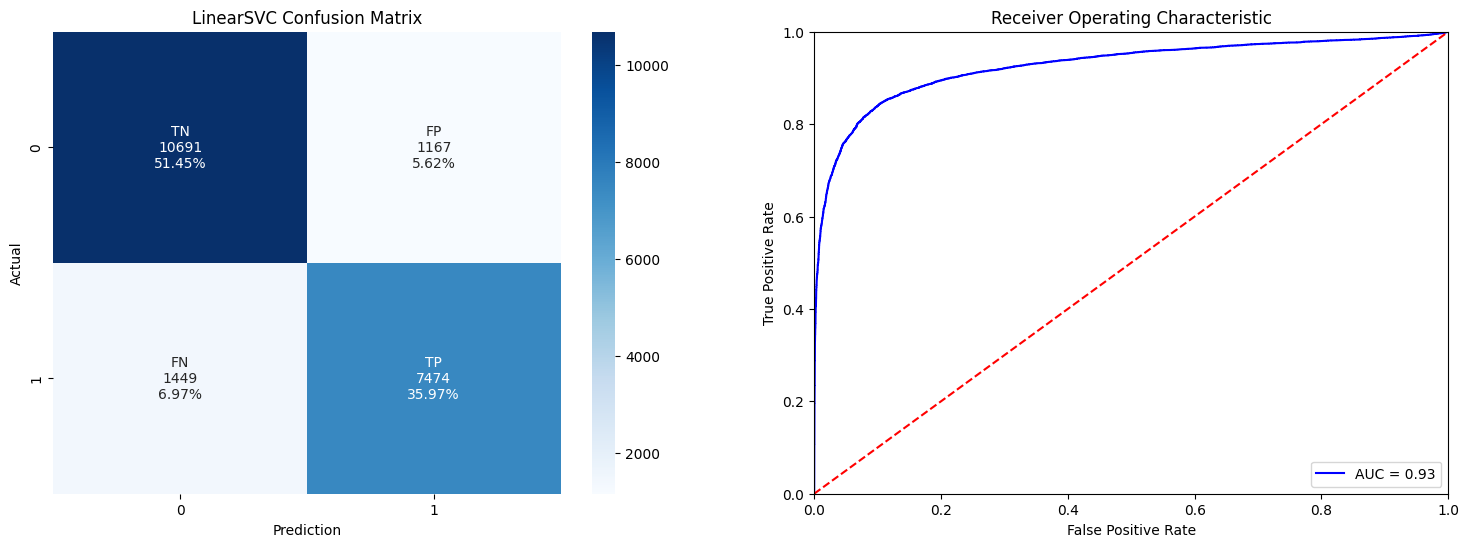

Stoch_GD : 

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.91      0.77      0.83     35308
              satisfaction       0.75      0.90      0.82     27034

                  accuracy                           0.83     62342
                 macro avg       0.83      0.84      0.83     62342
              weighted avg       0.84      0.83      0.83     62342

Validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.92      0.77      0.83     11858
              satisfaction       0.74      0.91      0.82      8923

                  accuracy                           0.83     20781
                 macro avg       0.83      0.84      0.83     20781
              weighted avg       0.84      0.83      0.83     20781

Accuracy score for traing dataset 0.8271630682365019
Accuracy score for validation dataset 0.8264279871036042
ROC AUC Score : 92.26%


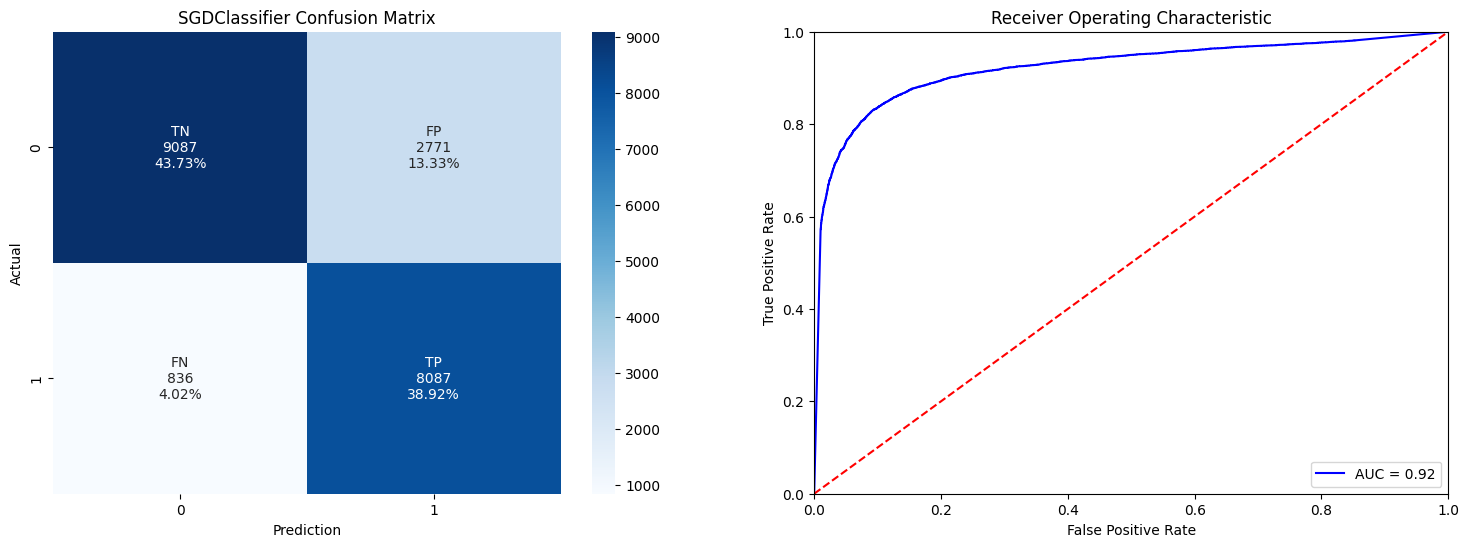

DT : 

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       1.00      1.00      1.00     35308
              satisfaction       1.00      1.00      1.00     27034

                  accuracy                           1.00     62342
                 macro avg       1.00      1.00      1.00     62342
              weighted avg       1.00      1.00      1.00     62342

Validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.96      0.95      0.95     11858
              satisfaction       0.94      0.94      0.94      8923

                  accuracy                           0.95     20781
                 macro avg       0.95      0.95      0.95     20781
              weighted avg       0.95      0.95      0.95     20781

Accuracy score for traing dataset 1.0
Accuracy score for validation dataset 0.9473076367836004
ROC AUC Score : 94.67%



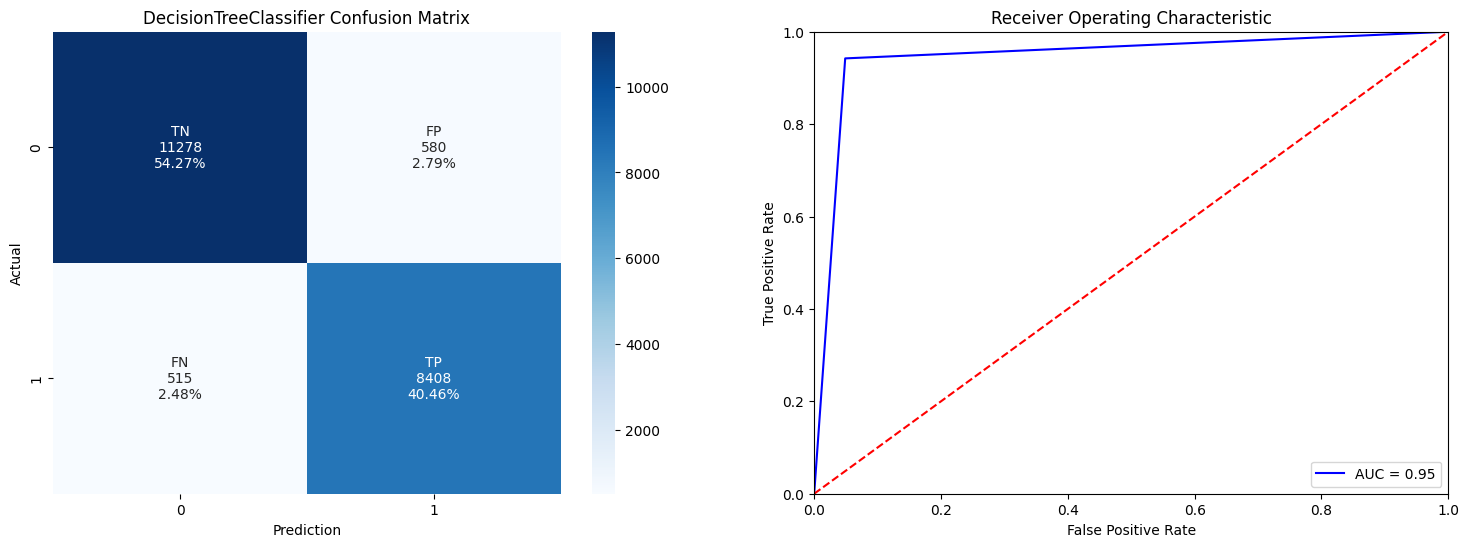

Ran_forest : 

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       1.00      1.00      1.00     35308
              satisfaction       1.00      1.00      1.00     27034

                  accuracy                           1.00     62342
                 macro avg       1.00      1.00      1.00     62342
              weighted avg       1.00      1.00      1.00     62342

Validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.96      0.98      0.97     11858
              satisfaction       0.97      0.94      0.96      8923

                  accuracy                           0.96     20781
                 macro avg       0.96      0.96      0.96     20781
              weighted avg       0.96      0.96      0.96     20781

Accuracy score for traing dataset 1.0
Accuracy score for validation dataset 0.9628988017900967
ROC AUC Score : 99.36%



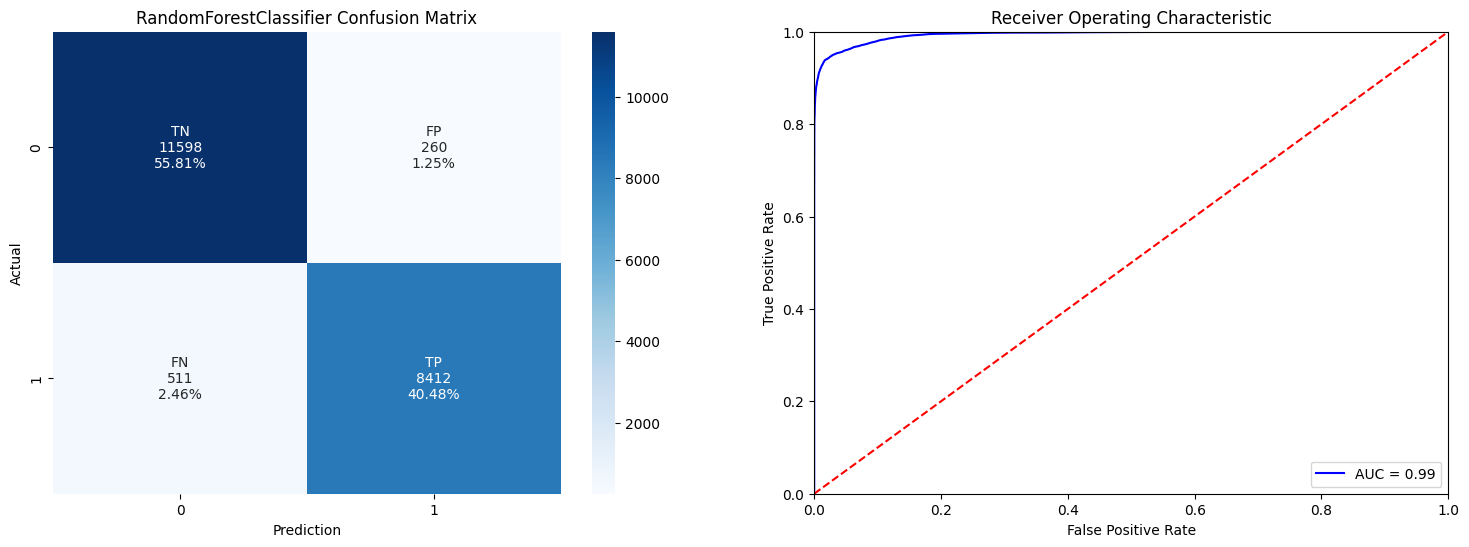

AdaBoost : 

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.93      0.94      0.94     35308
              satisfaction       0.92      0.91      0.92     27034

                  accuracy                           0.93     62342
                 macro avg       0.93      0.93      0.93     62342
              weighted avg       0.93      0.93      0.93     62342

Validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.94      0.94      0.94     11858
              satisfaction       0.92      0.91      0.92      8923

                  accuracy                           0.93     20781
                 macro avg       0.93      0.93      0.93     20781
              weighted avg       0.93      0.93      0.93     20781

Accuracy score for traing dataset 0.9286997529755221
Accuracy score for validation dataset 0.9284442519609258
ROC AUC Score : 97.74%


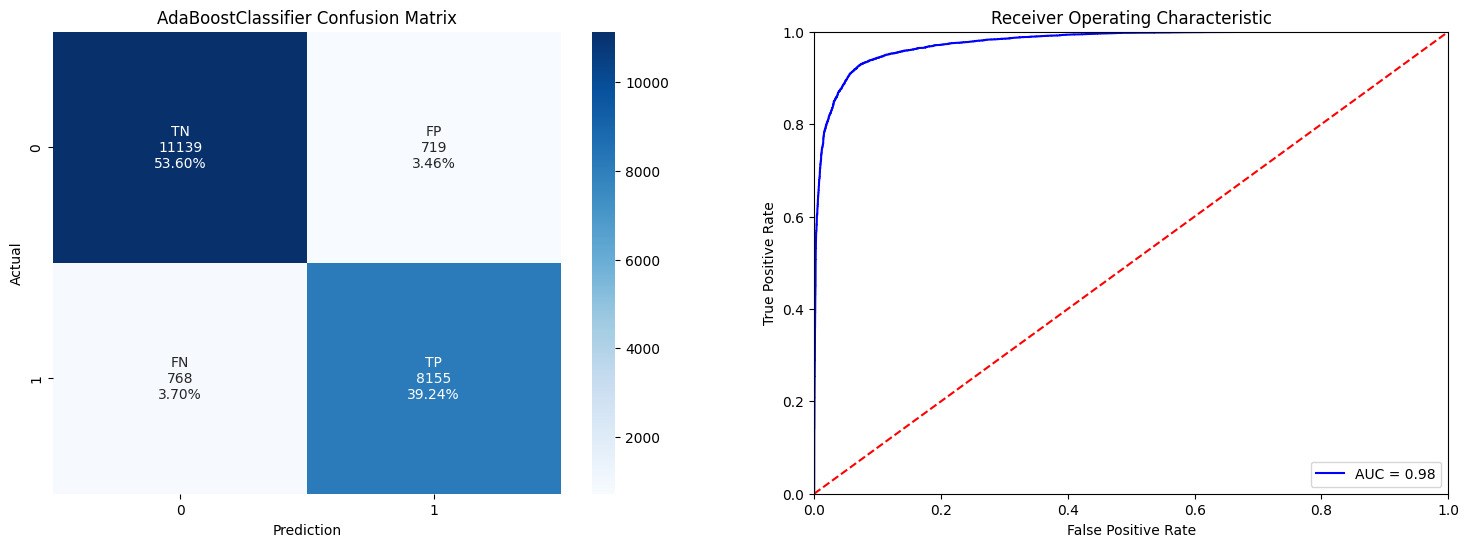

Grad_boost : 

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.94      0.96      0.95     35308
              satisfaction       0.95      0.92      0.93     27034

                  accuracy                           0.94     62342
                 macro avg       0.94      0.94      0.94     62342
              weighted avg       0.94      0.94      0.94     62342

Validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.94      0.96      0.95     11858
              satisfaction       0.94      0.92      0.93      8923

                  accuracy                           0.94     20781
                 macro avg       0.94      0.94      0.94     20781
              weighted avg       0.94      0.94      0.94     20781

Accuracy score for traing dataset 0.942526707516602
Accuracy score for validation dataset 0.9421587026610846
ROC AUC Score : 98.70%

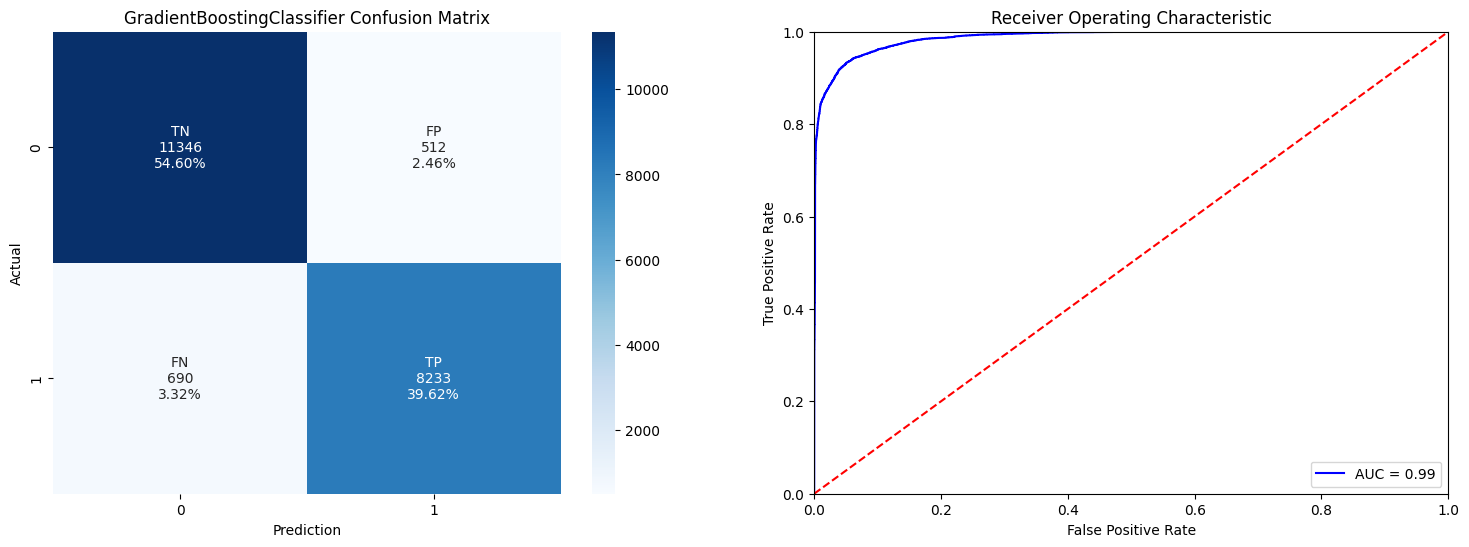

XGBoost : 

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.97      0.99      0.98     35308
              satisfaction       0.99      0.97      0.98     27034

                  accuracy                           0.98     62342
                 macro avg       0.98      0.98      0.98     62342
              weighted avg       0.98      0.98      0.98     62342

Validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.96      0.98      0.97     11858
              satisfaction       0.97      0.94      0.96      8923

                  accuracy                           0.96     20781
                 macro avg       0.96      0.96      0.96     20781
              weighted avg       0.96      0.96      0.96     20781

Accuracy score for traing dataset 0.9795322575470791
Accuracy score for validation dataset 0.9631394061883451
ROC AUC Score : 99.50%



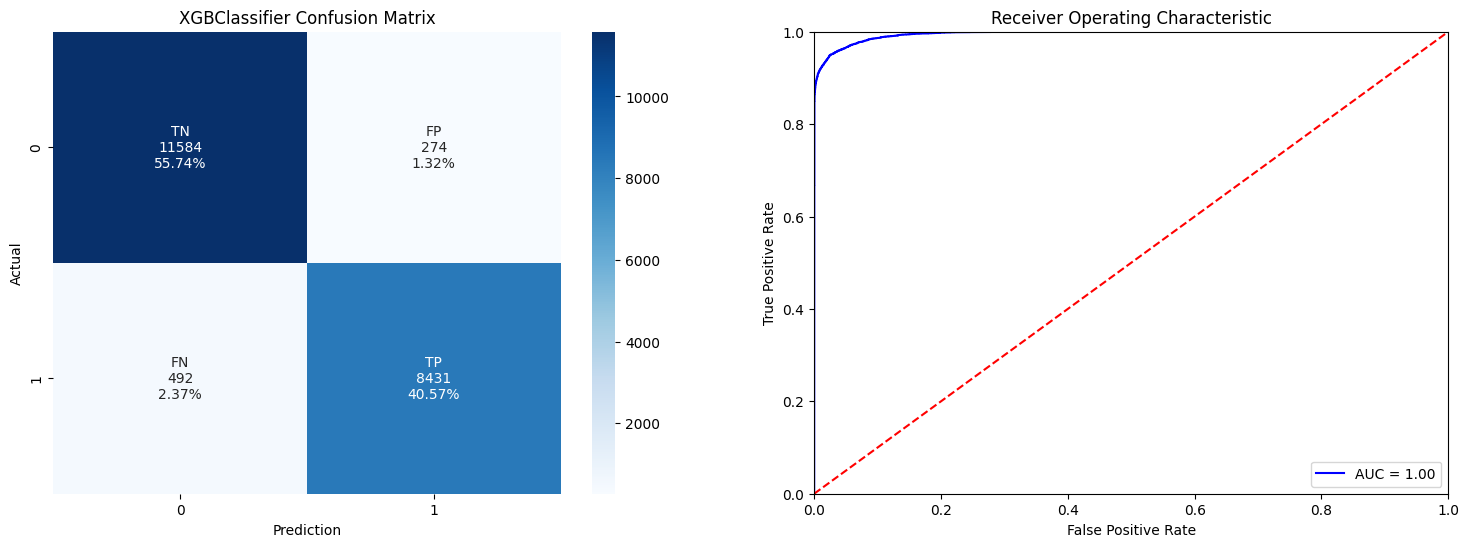

lightGbm : 

Training part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.96      0.98      0.97     35308
              satisfaction       0.98      0.95      0.96     27034

                  accuracy                           0.97     62342
                 macro avg       0.97      0.96      0.97     62342
              weighted avg       0.97      0.97      0.97     62342

Validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.96      0.98      0.97     11858
              satisfaction       0.97      0.94      0.96      8923

                  accuracy                           0.96     20781
                 macro avg       0.97      0.96      0.96     20781
              weighted avg       0.96      0.96      0.96     20781

Accuracy score for traing dataset 0.9675339257643323
Accuracy score for validation dataset 0.9638130985034407
ROC AUC Score : 99.51%


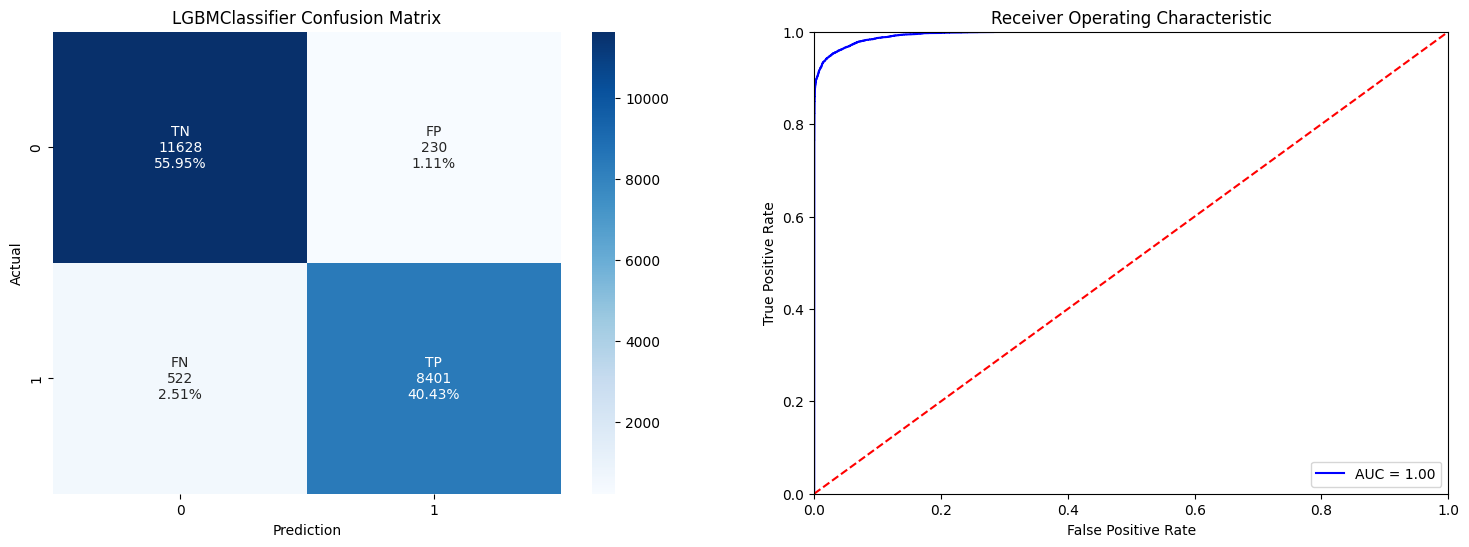

In [250]:

logisreg_clf =LogisticRegression(max_iter=1000)
GNB_clf = GaussianNB()
LSVC_clf = LinearSVC()
KN_clf = KNeighborsClassifier()
SGD_clf= SGDClassifier(loss='modified_huber',n_jobs=-1,random_state=42)
DT_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
adb_clf= AdaBoostClassifier()
GB_clf = GradientBoostingClassifier()
XGB_clf = XGBClassifier()
lgb_clf= lgb.LGBMClassifier()

clf_list = [logisreg_clf,GNB_clf,KN_clf,LSVC_clf,SGD_clf,DT_clf ,rf_clf,adb_clf,GB_clf,XGB_clf,lgb_clf]
clf_name_list = ['Log_reg','Gaus_NB','KNN','SVC','Stoch_GD','DT','Ran_forest','AdaBoost','Grad_boost','XGBoost','lightGbm']

X_train = np.array(X_train)
X_val = np.array(X_val)

for clf in clf_list:
    clf.fit(X_train, y_train)

train_acc_list = []
val_acc_list = []

for clf,name in zip(clf_list,clf_name_list):

    pred_train = clf.predict(X_train)
    pred_val = clf.predict(X_val)

    print(name,': \n')

    print('Training part:')
    print(classification_report(y_train, pred_train,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
    print('Validation part:')
    print(classification_report(y_val, pred_val,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
    print("Accuracy score for traing dataset",accuracy_score(y_train, pred_train))
    print("Accuracy score for validation dataset",accuracy_score(y_val, pred_val))

    train_acc_list.append(accuracy_score(y_train, pred_train))
    val_acc_list.append(accuracy_score(y_val, pred_val))

    make_classification_report(clf,X_val,y_val)

In [254]:
len(train_acc_list)

11

In [255]:
len(val_acc_list)

11

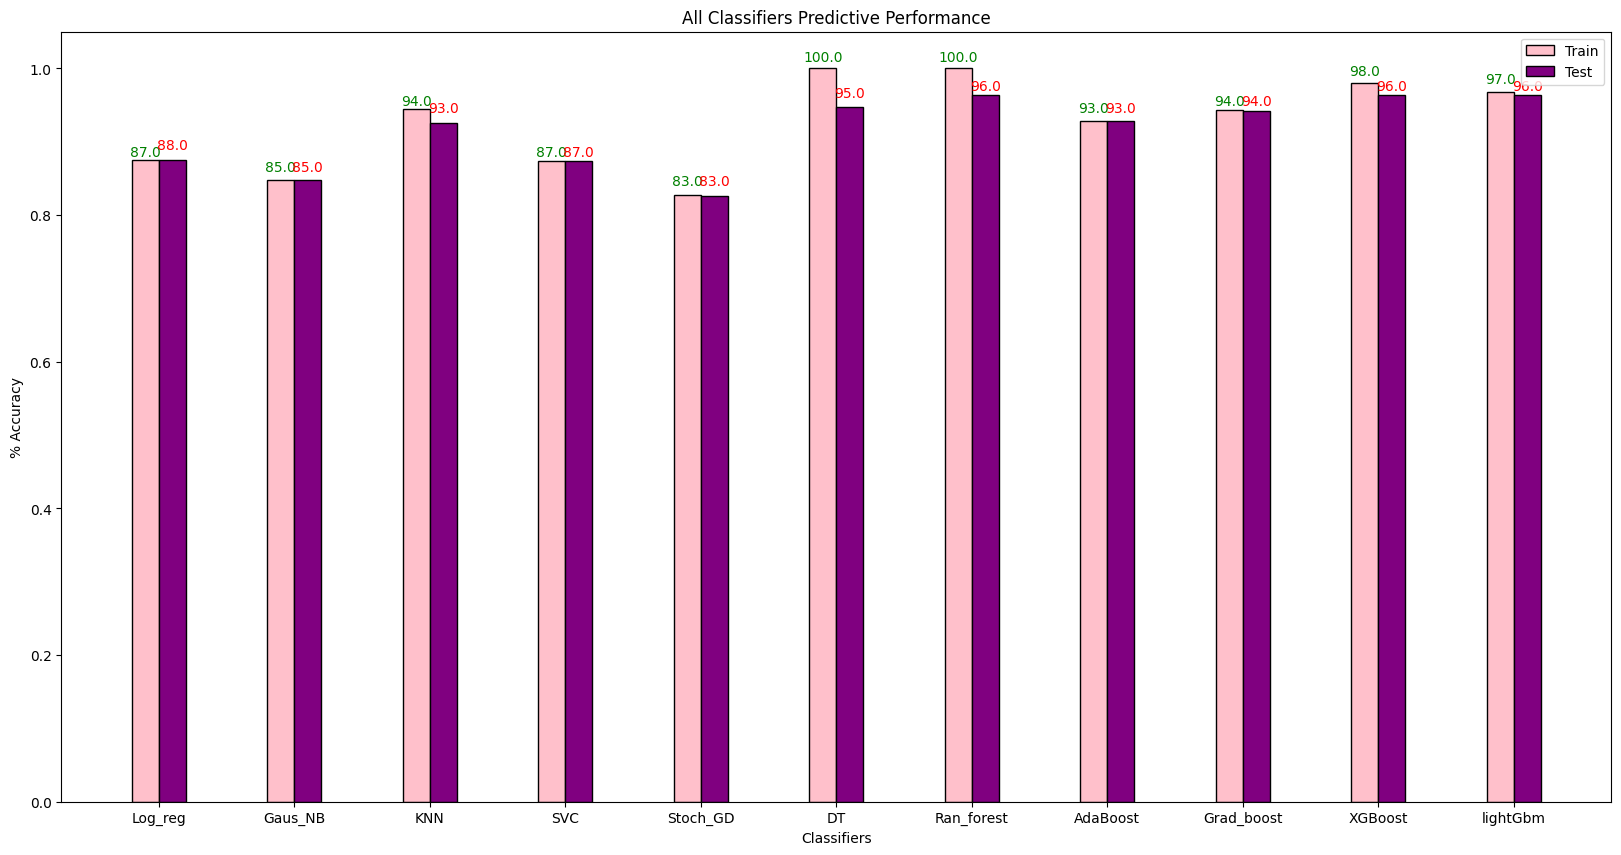

In [256]:
plt.figure(figsize=(20, 10))

n = np.arange(len(clf_name_list))
width = 0.2

plt.bar(n, train_acc_list, color='pink',
        width=width, edgecolor='black',
        label='Train')
for i in range(len(train_acc_list)):
    plt.text(i, train_acc_list[i].round(2) + 0.01, train_acc_list[i].round(2) * 100,
             ha='center', color='green')

plt.bar(n + width, val_acc_list, color='purple',
        width=width, edgecolor='black',
        label='Test')

for i in range(len(val_acc_list)):
    plt.text(i + width, val_acc_list[i].round(2) + 0.01, val_acc_list[i].round(2) * 100,
             ha='center', color='red')

plt.xlabel("Classifiers")
plt.ylabel("% Accuracy")
plt.title("All Classifiers Predictive Performance")
plt.xticks(n + width/2, clf_name_list)
plt.legend()
plt.show()
